# **Enhancing Marketing Precision: Predicting Term Deposit Subscriptions in Banking**


**Link to collab file:** https://colab.research.google.com/drive/16TCp-7MEtFoXNVjT0h43I5qOH3wApM5Q#scrollTo=hzc-6Qh-nbBs

**Contributors:** Adarsh Prajapat, Himani Tyagi, Olimpia Borgohain, Shailoz Kumar Singh

## I. **Problem Statement**

* The focus of this project is the analysis of direct marketing campaigns conducted by a Portuguese banking institution, where phone calls were utilized to engage potential clients

* Multiple contacts were established with the same clients to maximize effectiveness in determining their inclination towards subscribing to a term deposit ("yes") or not ("no")

* The primary goal is to develop a predictive model that can accurately forecast whether a client will subscribe to a term deposit or not based on the given dataset

   






## II. **Motivation**

The insights gained from this project can have practical implications for the banking/insurance institution's
marketing  strategies.  By  utilizing  predictive  models  based  on  the  direct  marketing  campaign  data,  the
institution can enhance its approach to client outreach. Specifically, it can identify clients who are more
likely to subscribe to term deposits, allowing for a more targeted and efficient use of resources.
* Additionally,  the  project's  findings  may  lead  to  improvements  in  campaign  design  and  execution.  For
instance,  the  institution  could  refine  its  messaging,  timing,  or  frequency  of  contacts  based  on  the
characteristics of clients that are more likely to convert.
* Moreover, a successful outcome of this project can have financial benefits for the institution. By increasing
the  effectiveness  of  their  marketing  campaigns,  they  may  experience  higher  conversion  rates  and
ultimately generate more revenue from term deposits.
* The findings from this project can also be valuable in the context of investment planning. By accurately
predicting  which  clients  are  more  likely  to  subscribe  to  term  deposits,  the  banking  institution  can  offer
tailored investment options and advice to those individuals. This personalized approach can help clients
make informed decisions about their investment portfolios, potentially leading to higher returns and greater
financial security.

## III. **Data Source**

We  are  using  the  dataset  from  the  UC  Irvine  Machine  Learning  Repository.  The  data  pertains  to
direct marketing campaigns (phone calls) conducted by a Portuguese banking institution. The objective of
classification is to predict whether the client will opt for a term deposit (denoted as variable "y").

Link to data set: https://archive.ics.uci.edu/dataset/222/bank+marketing


### **Data Dictionary:**

#### **Bank client data:**:
1. **age (numeric):** This feature represents the age of the individual, and it is expressed as a numeric value.
2. **job (categorical):** This feature describes the type of job the individual holds. The categories include "admin.," "blue-collar," "entrepreneur," "housemaid," "management," "retired," "self-employed," "services," "student," "technician," "unemployed," and "unknown."
3. **marital (categorical):** This feature indicates the marital status of the individual. The categories are "divorced," "married," "single," and "unknown." Note that "divorced" in this context includes both divorced and widowed individuals.
4. **education (categorical):** This feature describes the educational background of the individual. The categories include "basic.4y," "basic.6y," "basic.9y," "high.school," "illiterate," "professional.course," "university.degree," and "unknown".
5. **default (categorical):** This feature indicates whether the individual has credit in default. The categories are "no," "yes," and "unknown."
6. **housing (categorical):** This feature specifies whether the individual has a housing loan. The categories include "no," "yes," and "unknown."
7. **loan (categorical):** This feature indicates whether the individual has a personal loan. The categories are "no," "yes," and "unknown."

#### **Related with the last contact of the current campaign:**
8. **contact (categorical):** This feature represents the communication type used during the last contact with the individual. The categories are "cellular" and "telephone," indicating whether the contact was made via a mobile cellular device or a traditional telephone.
9. **month (categorical):** This feature denotes the last contact month of the year. The categories include "jan," "feb," "mar," and so on up to "dec."
10. **day_of_week (categorical):** This feature indicates the last contact day of the week. The categories are "mon," "tue," "wed," "thu," and "fri," representing Monday through Friday.
11. **duration (numeric):** This feature represents the duration of the last contact in seconds. It is a numeric value. It's important to note that this attribute significantly affects the output target, where a duration of 0 may imply that the target variable (denoted as 'y') is "no." However, the duration is not known before a call is made, and after the call ends, the outcome is known. Therefore, it is recommended to be cautious when including this variable in predictive models, especially if the intention is to create a realistic model for predicting outcomes.
### **other attributes:**
12. **campaign (numeric):** This feature represents the number of contacts performed during the current marketing campaign for the specific client. It includes the last contact made.
13. **pdays (numeric):** This feature indicates the number of days that have passed since the client was last contacted in a previous marketing campaign. The value 999 means the client was not previously contacted.
14. **previous (numeric):** This feature denotes the number of contacts performed before the current campaign and for the specific client.
15. **poutcome (categorical):** This feature represents the outcome of the previous marketing campaign for the client. The categories are "failure," "nonexistent," and "success."

#### **social and economic context attributes:**
16. **emp.var.rate (numeric):** Employment variation rate is a quarterly indicator reflecting changes in employment. It is a numeric value.
17. **cons.price.idx (numeric):** Consumer price index is a monthly indicator measuring changes in the prices paid by consumers for goods and services. It is a numeric value.
18. **cons.conf.idx (numeric):** Consumer confidence index is a monthly indicator gauging the level of consumer confidence in economic activity. It is a numeric value.
19. **euribor3m (numeric):** Euribor 3-month rate is a daily indicator representing the interest rates at which Eurozone banks offer three-month unsecured loans to each other. It is a numeric value.
20. **nr.employed (numeric):** Number of employees is a quarterly indicator reflecting the overall employment level. It is a numeric value.

#### **target variable:**
21. **y (binary):** This is the target variable, indicating whether the client has subscribed to a term deposit. It is a binary variable with "yes" or "no" values.


Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## IV. **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/BA810/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## V. **EDA**

In [ ]:
data = pd.read_csv(data_folder +'bank_additional_full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Now, let us see the shape of our datset.

In [ ]:
data.shape

(41188, 21)

We see that the dataset contains 21 columns and 41,188 rows. Now, let us get to understand the dataset a bit better.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We see from the above output that the most of the columns are not in their respsective data types.
First of all let us also confirm for the missing values once.

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We have no missing values in our dataset.
<br> Now, let us check the unique values of the columns that should be categorical data type and do the type conversion after that.

In [ ]:
data.y.unique()

array(['no', 'yes'], dtype=object)

Our target variable is y, it contains yes and no value.
* **yes** meaning the customer subsribed to the term deposit
* **no** meaning te customer did not subscribe to the term deposit


In [ ]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
data.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
#data.contact = data.contact.astype('category')

data = data.astype({'job': 'category', 'marital':'category', 'education':'category',
                    'default':'category', 'housing': 'category','loan': 'category' ,
                    'contact':'category', 'month': 'category', 'day_of_week': 'category',
                    'y' : 'category', 'poutcome': 'category'})

In [ ]:
data.default.unique()

['no', 'unknown', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']

Now, since we have converted all the columns to their respective data types according to the data dictionary, let us do `info()` once again

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

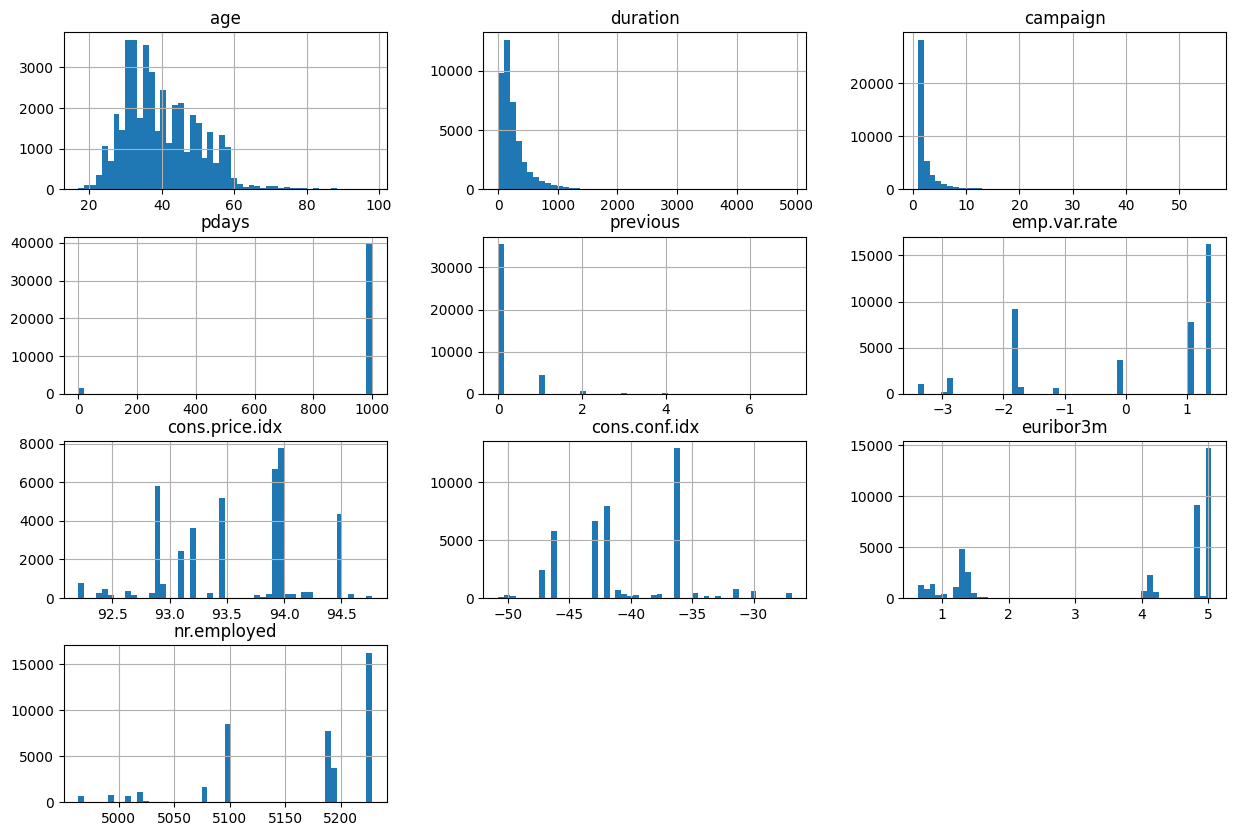

In [ ]:
data.hist(bins=50, figsize=(15, 10))
plt.show()

Now, let us try to understand if there is any relationshipp between age of a customer and them subscribing to a term deposit with respect to the number of contacts in the current campaign.

Text(0.5, 1.0, 'Age vs. Campaign')

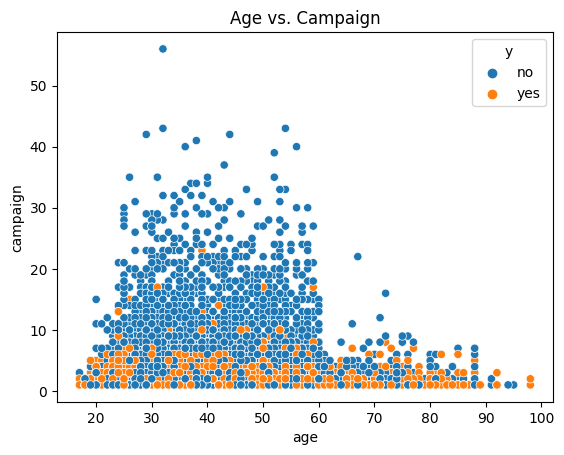

In [ ]:
sns.scatterplot(data = data, x = 'age', y = 'campaign', hue = 'y' )
plt.title('Age vs. Campaign')

From the plot we see that there is no major relationship between

Scatter plot to investigate the relationship between age and call duration.

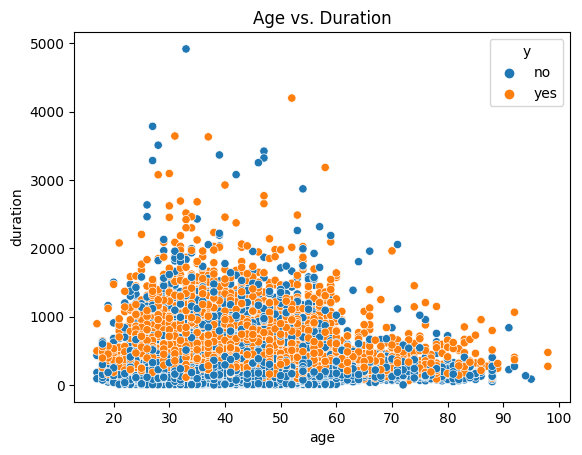

In [ ]:
sns.scatterplot(data = data, x = 'age', y = 'duration', hue = 'y')
plt.title('Age vs. Duration')
plt.show()

Calculate and visualize a correlation matrix to see how numerical variables (e.g., age, duration) are correlated with each other. This can help identify patterns and relationships between variables.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

<ipython-input-18-262ce48dced4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


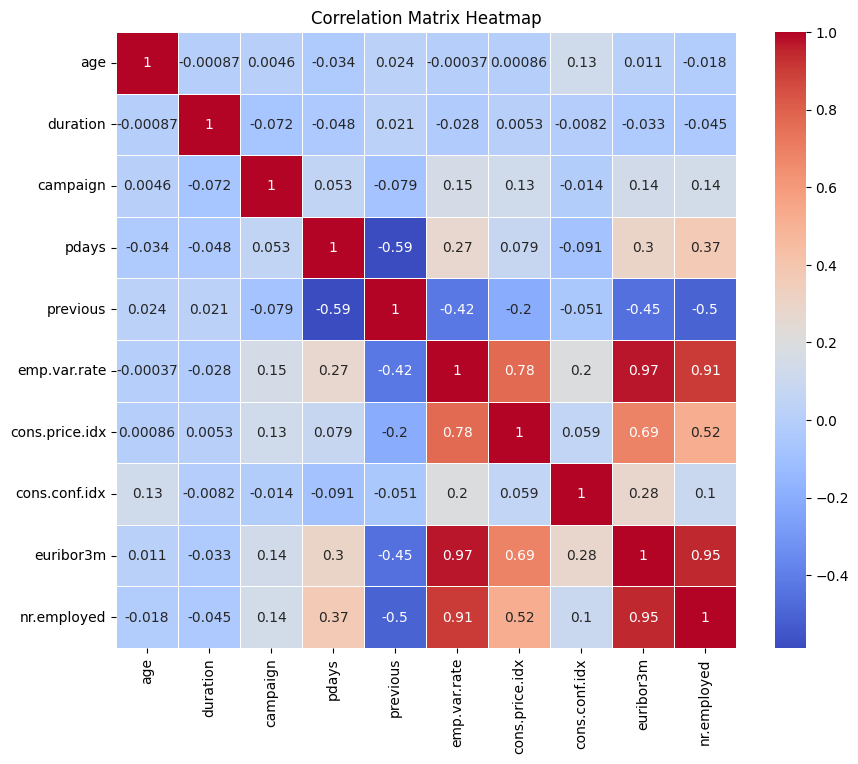

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

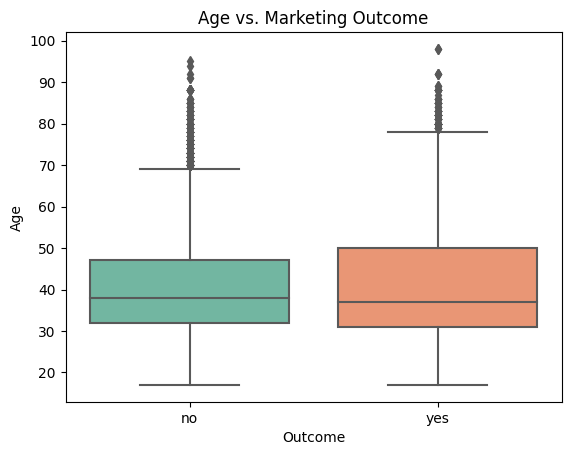

In [ ]:
sns.boxplot(x='y', y='age', data=data, palette='Set2')
plt.title('Age vs. Marketing Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

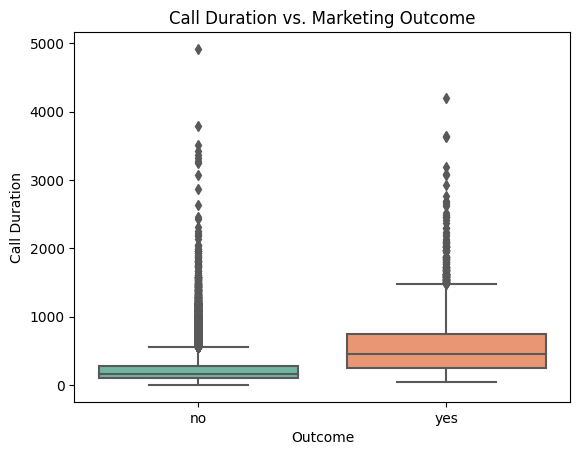

In [ ]:
sns.boxplot(x='y', y='duration', data=data, palette='Set2')
plt.title('Call Duration vs. Marketing Outcome')
plt.xlabel('Outcome')
plt.ylabel('Call Duration')
plt.show()

In [ ]:
print(data['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


In [ ]:
print(data['y'].value_counts(normalize = True))

no     0.887346
yes    0.112654
Name: y, dtype: float64


Text(0.5, 1.0, 'Distrubution of Customers Opting For Term Deposits')

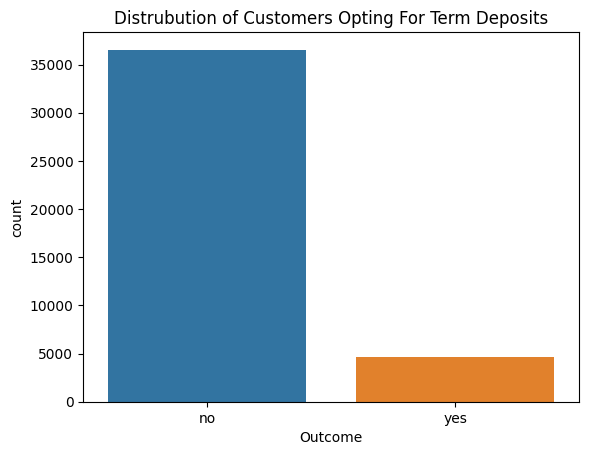

In [ ]:
sns.countplot(data = data, x = data['y'])
plt.xlabel('Outcome')
plt.title('Distrubution of Customers Opting For Term Deposits')

In [ ]:
# Convert the target variable to binary, to ensure correct interpretation of the coefficients.
# data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## VI. **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1) # separate X ...
y = data['y'].copy()       # from y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state=42) #split all
X_train.shape, X_test.shape, y_train.shape, y_test.shape # check sizes

((32950, 20), (8238, 20), (32950,), (8238,))

In [ ]:
y_train.head()

25611     no
26010     no
40194    yes
297       no
36344     no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']

In [ ]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']

## VII. **Creating the Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config


In [ ]:
set_config(display = 'diagram')

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer( strategy= 'most_frequent')),
    ("cat_encoder", OneHotEncoder())
  ])
cat_attributes = [ 'job', 'marital', 'education', 'default', 'housing',
                  'loan', 'contact', 'month', 'day_of_week',
                   'poutcome',
]
num_attributes = [ 'age', 'duration' ,  'campaign',  'pdays',
                  'previous', 'emp.var.rate', 'cons.price.idx',
                  'cons.conf.idx', 'euribor3m', 'nr.employed',

]

preprocess_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_attributes),
        ("num", num_pipeline, num_attributes),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder())]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'day_of_week', 'poutcome']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'duration', 'campaign', 'pdays',
                                  'previous', 'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed'])])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

full_pipeline = make_pipeline(preprocess_pipeline, LogisticRegression(max_iter=1000))
full_pipeline.fit(X_train, y_train)
full_cv_rmses = cross_val_score(full_pipeline, X_train, y_train,
                              scoring="balanced_accuracy", cv=5)
print('Cross validation balanced accuracy {:.3f}'.format(full_cv_rmses.mean()))

Cross validation balanced accuracy 0.694


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

kbest = SelectKBest(score_func=mutual_info_classif) # a measure of dependence for classification

k_best_pipe = Pipeline([
    ('prep', preprocess_pipeline),
    ('select', kbest),
    ('model', LogisticRegression(max_iter=1000)) # the default max_iter=100 wasn't enough
])

param_grid = {
    'select__k': range(1, X_train.shape[1] + 1)
}

grid_search = GridSearchCV(k_best_pipe, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)


# Examine the results
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex = '(^param_|mean_test_score)', axis=1))

best_model = grid_search.best_estimator_
print(f'The selected {best_model["select"].get_support().sum()} features are {best_model["prep"].get_feature_names_out()[best_model["select"].get_support()]}')
# Not easy to extract selected feature names inside the pipeline. We get the columns produced by
# "prep" step before "select" and use the 0/1 indices of used columns from the "select" step to
# print them.

,param_select__k,mean_test_score
17,18,0.690592
19,20,0.690473
16,17,0.690059
15,16,0.688392
11,12,0.688380
14,15,0.688324
13,14,0.688312
18,19,0.687779
10,11,0.687318
12,13,0.687081


The selected 18 features are ['cat__default_no' 'cat__default_unknown' 'cat__contact_cellular'
 'cat__contact_telephone' 'cat__month_may' 'cat__month_oct'
 'cat__month_sep' 'cat__poutcome_nonexistent' 'cat__poutcome_success'
 'num__age' 'num__duration' 'num__pdays' 'num__previous'
 'num__emp.var.rate' 'num__cons.price.idx' 'num__cons.conf.idx'
 'num__euribor3m' 'num__nr.employed']


Optimal number of features: 36
Selected features: ['cat__job_blue-collar' 'cat__job_entrepreneur' 'cat__job_retired'
 'cat__job_self-employed' 'cat__job_services' 'cat__job_student'
 'cat__marital_unknown' 'cat__education_basic.4y'
 'cat__education_basic.9y' 'cat__education_high.school'
 'cat__education_illiterate' 'cat__education_professional.course'
 'cat__default_no' 'cat__default_unknown' 'cat__contact_cellular'
 'cat__contact_telephone' 'cat__month_apr' 'cat__month_aug'
 'cat__month_jul' 'cat__month_jun' 'cat__month_mar' 'cat__month_may'
 'cat__month_nov' 'cat__month_oct' 'cat__day_of_week_mon'
 'cat__day_of_week_wed' 'cat__poutcome_failure' 'cat__poutcome_success'
 'num__duration' 'num__campaign' 'num__pdays' 'num__emp.var.rate'
 'num__cons.price.idx' 'num__cons.conf.idx' 'num__euribor3m'
 'num__nr.employed']
CV Balanced Accuracy at optimal number of features: 0.696


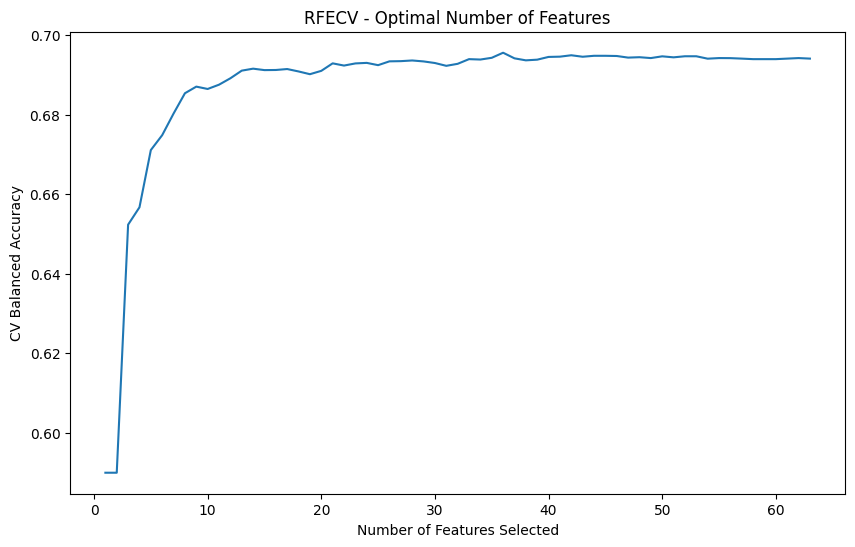

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(LogisticRegression(max_iter=1000), scoring='balanced_accuracy')

rfecv_pipe = Pipeline([
    ('prep', preprocess_pipeline),
    ('select', rfecv),
    # ('model', LogisticRegression(max_iter=1000)) # uncomment/replace model to fit with the selected features
])

rfecv_pipe.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("CV Balanced Accuracy")
mean_score = rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(mean_score) + 1), mean_score)

optimal_num_features = rfecv.n_features_
optimal_rmse = rfecv.cv_results_['mean_test_score'][optimal_num_features - 1]
print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {rfecv_pipe['prep'].get_feature_names_out()[rfecv.support_]}")
print(f"CV Balanced Accuracy at optimal number of features: {optimal_rmse:.3f}")


## VIII. **Implementing Classification Algorithms**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, balanced_accuracy_score
from sklearn.metrics import classification_report

# Define a function to print evaluation scores for all the algorithms
def print_scores(y_test, y_pred):
  plt.rc("font", size=20)
  cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Greens, colorbar= True)
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f' Accuracy = {accuracy:.4f}, Balanced Accuracy = {balanced_accuracy:.4f}')
  precision = precision_score(y_test, y_pred, pos_label= 'yes')
  recall = recall_score(y_test, y_pred, pos_label= 'yes')
  f1 = f1_score(y_test, y_pred, pos_label= 'yes')
  print(f' Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}')


### **1. KNN**









In [ ]:
# KNN model pipeline using make_pipeline
knn_pipe = make_pipeline(preprocess_pipeline, KNeighborsClassifier())  # default k = 5, weight = uniform, metic = minkoswki

# Fit the pipeline on training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

 Accuracy = 0.9075, Balanced Accuracy = 0.7066
 Precision = 0.6250, Recall = 0.4472, F1-score = 0.5214


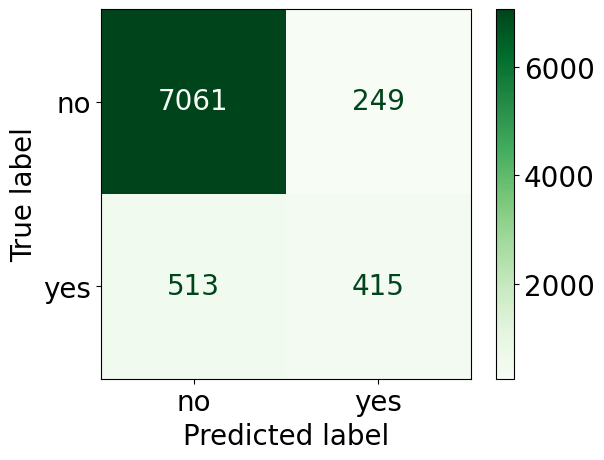

In [ ]:
# Predict on test data
y_pred = knn_pipe.predict(X_test)

# Print evaluation scores
print_scores(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score

# Fit and cross-validate the KNN model using knn_pipe
knn_scores = cross_val_score(knn_pipe, X_train, y_train, cv=5, scoring='balanced_accuracy')
print(knn_scores)

[0.67635144 0.68665054 0.67373138 0.68749179 0.68353961]


The precision of the classifier is 0.6250, meaning that 62.50% of the instances that it predicted to be positive were actually positive. The recall of the classifier is 0.4472, meaning that it identified 44.72% of the actual positive instances. The F1-score of the classifier is 0.5214, which is a harmonic mean of the precision and recall.



In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.62      0.45      0.52       928

    accuracy                           0.91      8238
   macro avg       0.78      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238



The accuracy of the KNN classifier is 0.91, which means that it correctly classified 91% of the instances. The precision of the classifier is 0.93 for the 'no' class and 0.62 for the 'yes' class. This means that the classifier is more accurate at predicting negative instances than positive instances. The recall of the classifier is 0.97 for the 'no' class and 0.45 for the 'yes' class. This means that the classifier is more likely to correctly identify negative instances than positive instances. The f1-score of the classifier is 0.95 for the 'no' class and 0.52 for the 'yes' class. This means that the classifier is more accurate at classifying negative instances than positive instances.



### **Evaluating KNN under different balancing strategies**

#### **1. Random Over Sampling**

 Accuracy = 0.8622, Balanced Accuracy = 0.8222
 Precision = 0.4368, Recall = 0.7705, F1-score = 0.5575


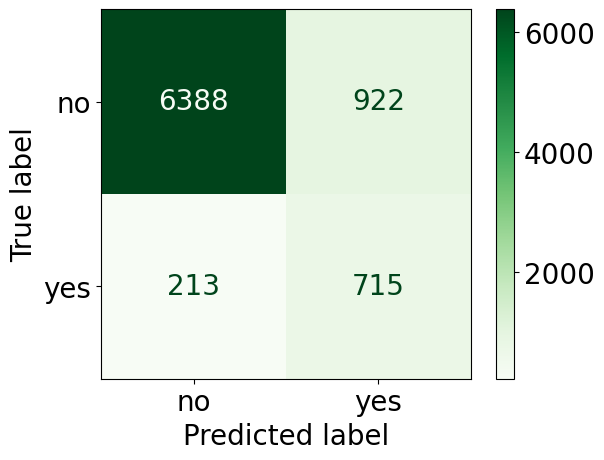

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler


knn_over_pipe = make_pipeline(preprocess_pipeline, RandomOverSampler(random_state=42), KNeighborsClassifier())
knn_over_pipe.fit(X_train, y_train)
y_pred = knn_over_pipe.predict(X_test)
print_scores(y_test, y_pred)

The results show that the KNN classifier has a higher accuracy under Random Over Sampling (0.8622) than under Balanced Accuracy (0.8222). This suggests that Random Over Sampling is an effective technique for improving the performance of KNN classifiers on imbalanced datasets.

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.87      0.92      7310
         yes       0.44      0.77      0.56       928

    accuracy                           0.86      8238
   macro avg       0.70      0.82      0.74      8238
weighted avg       0.91      0.86      0.88      8238



In summary, the model demonstrates high precision for the majority class ("no") but has challenges with recall and F1-score for the minority class ("yes"). The overall accuracy is 86%, and class-specific metrics provide a detailed understanding of the model's performance under the Random Over Sampling strategy.



#### **2. SMOTE**

 Accuracy = 0.8528, Balanced Accuracy = 0.8404
 Precision = 0.4215, Recall = 0.8244, F1-score = 0.5578


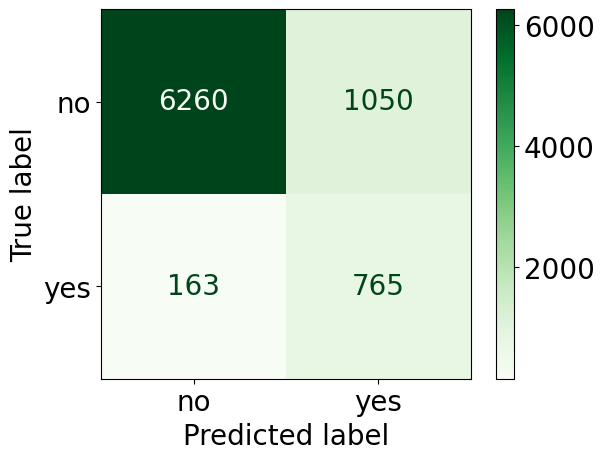

In [ ]:
from imblearn.over_sampling import SMOTE

knn_smote_pipe = make_pipeline(preprocess_pipeline, SMOTE(random_state=1), KNeighborsClassifier())
knn_smote_pipe.fit(X_train, y_train)
y_pred = knn_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7310
         yes       0.42      0.82      0.56       928

    accuracy                           0.85      8238
   macro avg       0.70      0.84      0.73      8238
weighted avg       0.91      0.85      0.87      8238



SMOTE: Under SMOTE, the KNN classifier has a higher precision (0.4215) than recall (0.8244). This means that the classifier is more likely to correctly identify positive instances than negative instances. This is because SMOTE increases the number of positive instances in the training dataset, which makes the classifier more sensitive to positive instances. Balanced Accuracy: Under Balanced Accuracy, the KNN classifier has a more balanced precision (0.4008) and recall (0.7190). This means that the classifier is more likely to correctly identify both positive and negative instances. This is because Balanced Accuracy takes into account the accuracy of both classes when evaluating the performance of the classifier.



#### **3. ADASYN**

 Accuracy = 0.8421, Balanced Accuracy = 0.8343
 Precision = 0.4020, Recall = 0.8244, F1-score = 0.5404


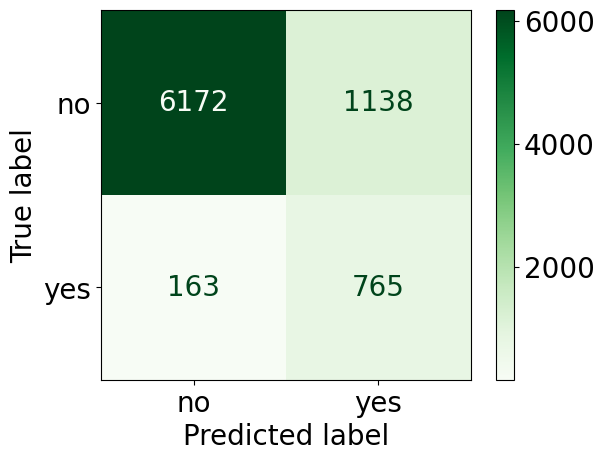

In [ ]:
from imblearn.over_sampling import ADASYN

knn_adasyn_pipe = make_pipeline(preprocess_pipeline, ADASYN(random_state=42), KNeighborsClassifier())
knn_adasyn_pipe.fit(X_train, y_train)
y_pred = knn_adasyn_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.84      0.90      7310
         yes       0.40      0.82      0.54       928

    accuracy                           0.84      8238
   macro avg       0.69      0.83      0.72      8238
weighted avg       0.91      0.84      0.86      8238



The overall accuracy is 84%, and the detailed class-specific metrics provide a comprehensive view of the model's performance without any explicit balancing technique.

#### **4. Border Line SMOTE**

 Accuracy = 0.8559, Balanced Accuracy = 0.8398
 Precision = 0.4272, Recall = 0.8190, F1-score = 0.5615


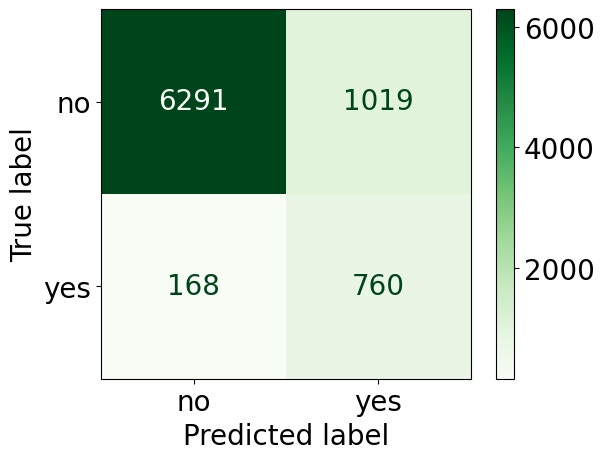

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

knn_border_smote_pipe = make_pipeline(preprocess_pipeline, BorderlineSMOTE(random_state=42), KNeighborsClassifier())
knn_border_smote_pipe.fit(X_train, y_train)
y_pred = knn_border_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7310
         yes       0.43      0.82      0.56       928

    accuracy                           0.86      8238
   macro avg       0.70      0.84      0.74      8238
weighted avg       0.91      0.86      0.87      8238



In summary, under the Borderline SMOTE balancing strategy, the KNN model demonstrates high precision for the majority class ("no") and a trade-off in recall and F1-score for the minority class ("yes"). The overall accuracy is 86%, providing a comprehensive view of the model's performance with the Borderline SMOTE technique.

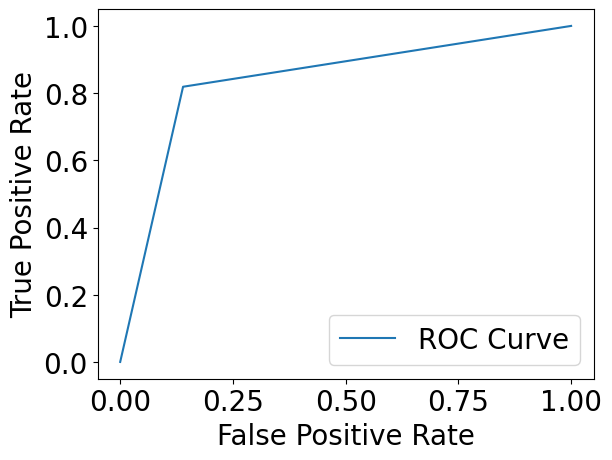

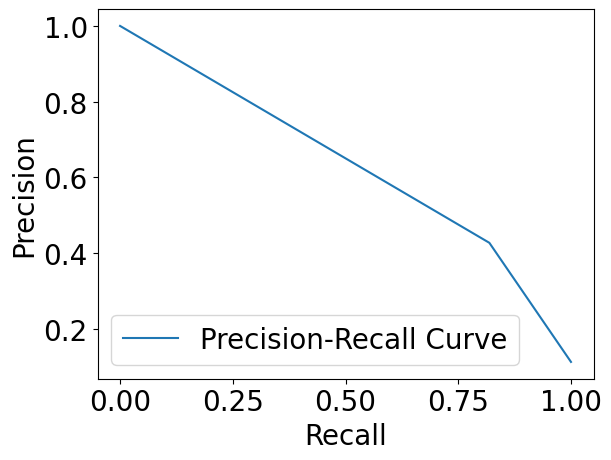

In [ ]:
# Converting categorical labels to binary format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Using roc_curve with the binary labels
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Using precision_recall_curve with the binary labels
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_binary)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### **Observations:**
* The model's overall accuracy is decent, but the balanced accuracy is somewhat lower, indicating potential class imbalances.

* Precision for 'yes' cases is moderate `(0.583)`, but recall is relatively low `(0.442)`. It's identifying 'yes' cases less effectively.

* The F1 score shows a moderate balance between precision and recall.

* It's essential to note that there's a notable imbalance between precision and recall for `'yes'` cases. The model is better at correctly identifying `'no'` cases ('high precision and recall') than 'yes' cases ('lower recall and precision').

### Conclusion:
The model's performance is reasonable but tends to misclassify 'yes' cases more often than desired.
Depending on the application, this model might not be sufficient if correctly identifying `'yes'` cases (high recall and precision for 'yes') is crucial.

### **2. SVM**

 Accuracy = 0.9154, Balanced Accuracy = 0.6997
 Precision = 0.7096, Recall = 0.4213, F1-score = 0.5287


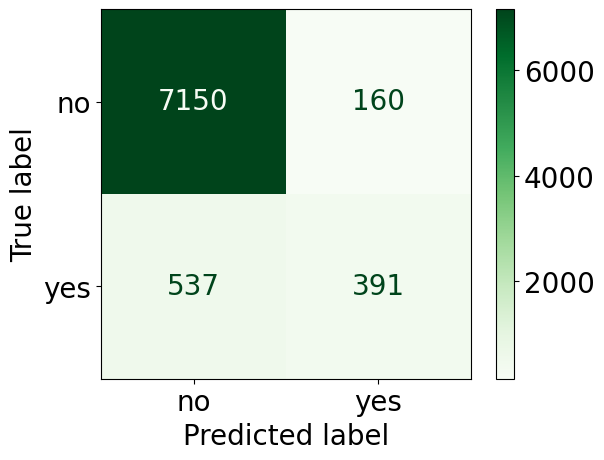

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Create a pipeline with SVM
svm_pipe = make_pipeline(preprocess_pipeline, SVC())  # c = 1.0, degree = 3, kernel = rbf, gamma = scale
svm_pipe.fit(X_train, y_train)  # fit the pipeline on training data

print_scores(y_test, svm_pipe.predict(X_test))  # apply to the test data
y_pred_svm = svm_pipe.predict(X_test)


In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7310
         yes       0.43      0.82      0.56       928

    accuracy                           0.86      8238
   macro avg       0.70      0.84      0.74      8238
weighted avg       0.91      0.86      0.87      8238



### **Evaluating SVM under different balancing strategies**

Now, lets try out for balanced and see the difference.

 Accuracy = 0.8651, Balanced Accuracy = 0.8826
 Precision = 0.4509, Recall = 0.9052, F1-score = 0.6019


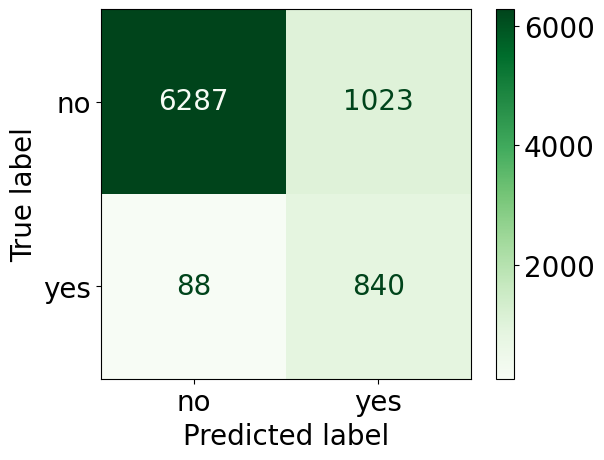

In [ ]:
# Create an SVM pipeline
svm_pipe = make_pipeline(preprocess_pipeline, StandardScaler(), SVC(class_weight='balanced'))

# Fit the SVM model
svm_pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_pipe.predict(X_test)

# Print scores
print_scores(y_test, y_pred_svm)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7310
         yes       0.43      0.82      0.56       928

    accuracy                           0.86      8238
   macro avg       0.70      0.84      0.74      8238
weighted avg       0.91      0.86      0.87      8238



#### **1. Random Over Sampler**

 Accuracy = 0.8530, Balanced Accuracy = 0.8899
 Precision = 0.4301, Recall = 0.9375, F1-score = 0.5896


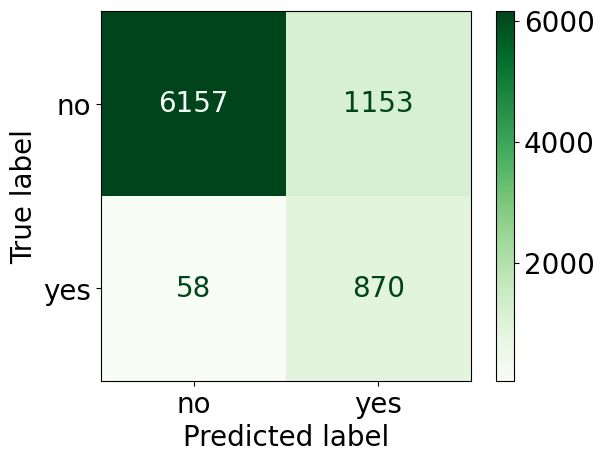

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

# Create the pipeline with RandomOverSampler and Support Vector Machine
svm_over_pipe = make_pipeline(preprocess_pipeline, RandomOverSampler(random_state=42), SVC())

# Fit the pipeline on the training data
svm_over_pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_over_pipe.predict(X_test)

# Print scores or perform other evaluation tasks
print_scores(y_test, y_pred_svm)


In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7310
         yes       0.43      0.82      0.56       928

    accuracy                           0.86      8238
   macro avg       0.70      0.84      0.74      8238
weighted avg       0.91      0.86      0.87      8238



#### **2. SMOTE**

In [ ]:
# from imblearn.over_sampling import SMOTE  # took a long time to run

# svm_smote_pipe = make_pipeline(preprocess_pipeline, SMOTE(random_state=42), SVC(probability=True))  # Setting probability=True for ROC-AUC evaluation
# svm_smote_pipe.fit(X_train, y_train)
# y_pred = svm_smote_pipe.predict(X_test)
# print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
# classification_rep = classification_report(y_test, y_pred)
# print(classification_rep)

#### **3. ADASYN**

 Accuracy = 0.8620, Balanced Accuracy = 0.8766
 Precision = 0.4441, Recall = 0.8955, F1-score = 0.5938


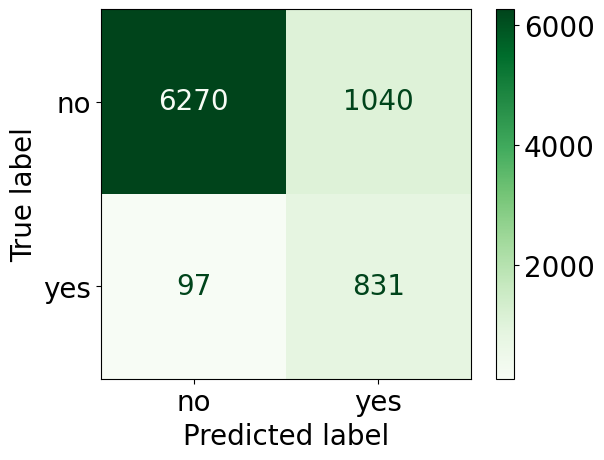

In [ ]:
from imblearn.over_sampling import ADASYN

svm_adasyn_pipe = make_pipeline(preprocess_pipeline, ADASYN(random_state=42), SVC())
svm_adasyn_pipe.fit(X_train, y_train)
y_pred_svm = svm_adasyn_pipe.predict(X_test)
print_scores(y_test, y_pred_svm)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7310
         yes       0.43      0.82      0.56       928

    accuracy                           0.86      8238
   macro avg       0.70      0.84      0.74      8238
weighted avg       0.91      0.86      0.87      8238



#### **4. Borderline SMOTE**

 Accuracy = 0.8752, Balanced Accuracy = 0.8826
 Precision = 0.4715, Recall = 0.8922, F1-score = 0.6170


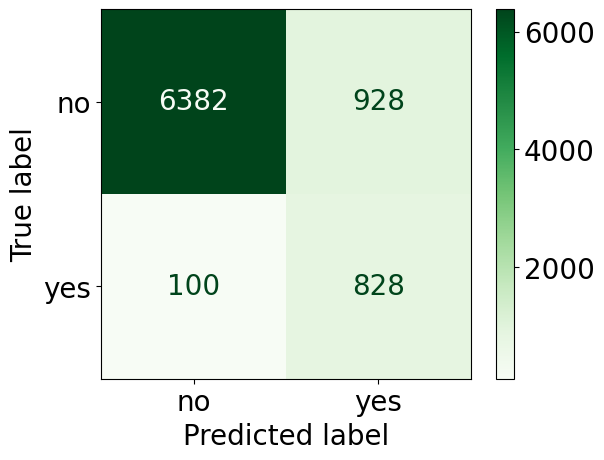

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

svm_smote_pipe = make_pipeline(preprocess_pipeline, BorderlineSMOTE(random_state=42), SVC())
svm_smote_pipe.fit(X_train, y_train)
y_pred_svm = svm_smote_pipe.predict(X_test)
print_scores(y_test, y_pred_svm)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7310
         yes       0.43      0.82      0.56       928

    accuracy                           0.86      8238
   macro avg       0.70      0.84      0.74      8238
weighted avg       0.91      0.86      0.87      8238



#### **5. SVM SMOTE**

 Accuracy = 0.8753, Balanced Accuracy = 0.8869
 Precision = 0.4721, Recall = 0.9019, F1-score = 0.6198


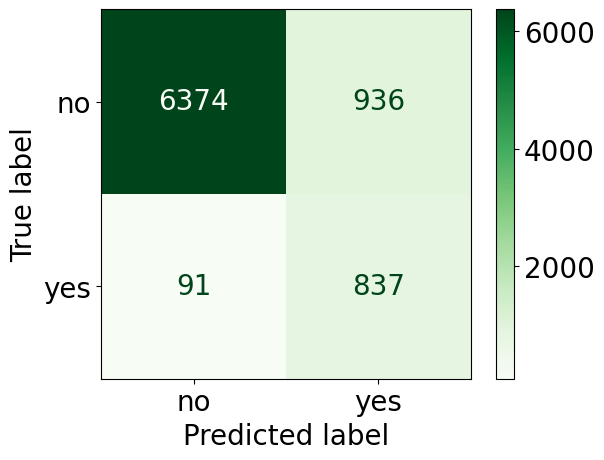

In [ ]:
from imblearn.over_sampling import SVMSMOTE

svm_smote_pipe = make_pipeline(preprocess_pipeline, SVMSMOTE(random_state=42), SVC())
svm_smote_pipe.fit(X_train, y_train)
y_pred_svm = svm_smote_pipe.predict(X_test)
print_scores(y_test, y_pred_svm)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.97      0.86      0.91      7310
         yes       0.43      0.82      0.56       928

    accuracy                           0.86      8238
   macro avg       0.70      0.84      0.74      8238
weighted avg       0.91      0.86      0.87      8238



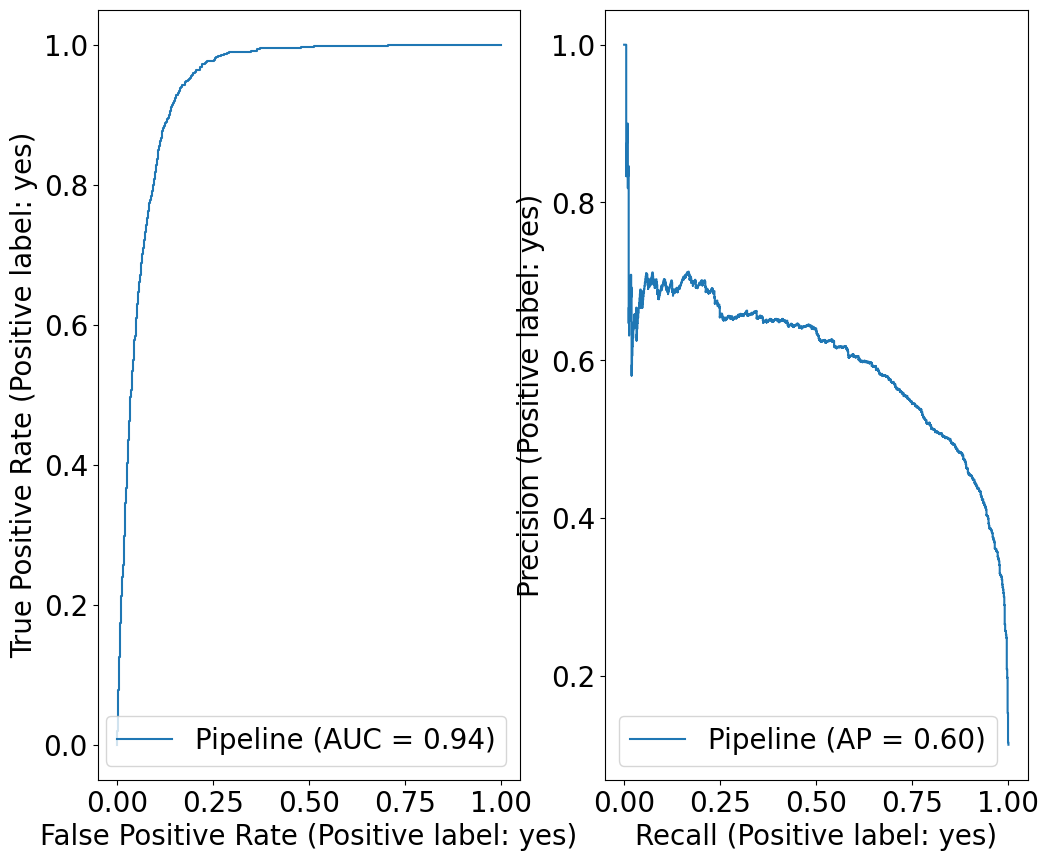

In [ ]:
# @title Precision and Recall Curve

# Import necessary libraries for plotting and metric displays
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Create a figure with two subplots side by side.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))
# We'll use the two returned 'Axes' (regions) to plot curves side by side

# Generate and plot the ROC curve using the Logistic Regression pipeline, passing first axis to plot ROC on
roc_curve = RocCurveDisplay.from_estimator(svm_pipe, X_test, y_test, ax=ax1)

# Generate and plot the Precision-Recall curve using the Logistic Regression pipeline, passing second axis to plot PR curve on
pr_curve = PrecisionRecallDisplay.from_estimator(svm_pipe, X_test, y_test, ax=ax2)


### **3. Logistic Reression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline

lr_pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("logistic_regression", LogisticRegression( random_state=42)),  ## (default penalty = "l2") , (default solver = "lbfgs")
])

lr_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('logistic_regression', LogisticRegression(random_state=42))])

 Accuracy = 0.9161, Balanced Accuracy = 0.7058
 Precision = 0.7083, Recall = 0.4343, F1-score = 0.5384


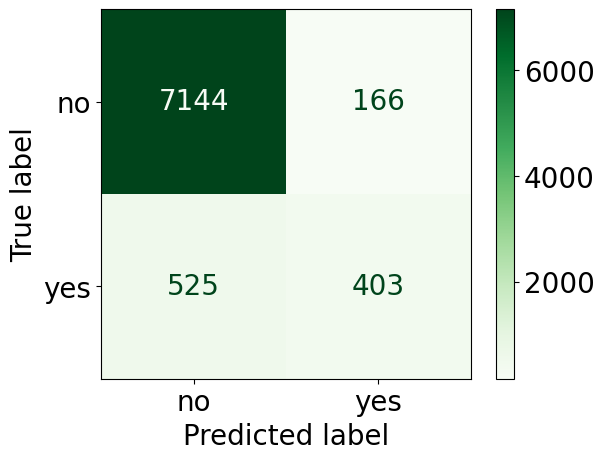

In [ ]:
from sklearn.linear_model import LogisticRegression


#lr_pipe = make_pipeline(preprocess_pipeline, LogisticRegression()) # append to the preprocessing pipeline
# lr_pipe.fit(X_train, y_train) # fit the pipeline on training data
print_scores(y_test, lr_pipeline.predict(X_test)) # apply to the test data
y_pred = lr_pipeline.predict(X_test)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7310
         yes       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



#### **1. Balanced Logistic regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy = 0.8654, Balanced Accuracy = 0.8856
 Precision = 0.4517, Recall = 0.9116, F1-score = 0.6041


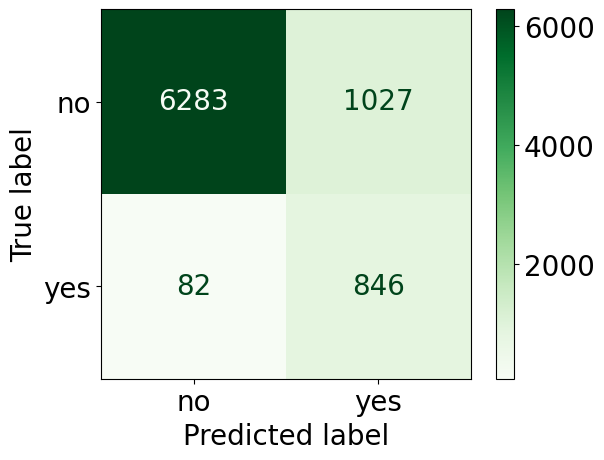

In [ ]:
lr_pipe = make_pipeline(preprocess_pipeline, LogisticRegression(class_weight='balanced'))
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.99      0.86      0.92      7310
         yes       0.45      0.91      0.60       928

    accuracy                           0.87      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.87      0.88      8238



#### **2. Random Over sampler**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy = 0.8664, Balanced Accuracy = 0.8871
 Precision = 0.4537, Recall = 0.9138, F1-score = 0.6064


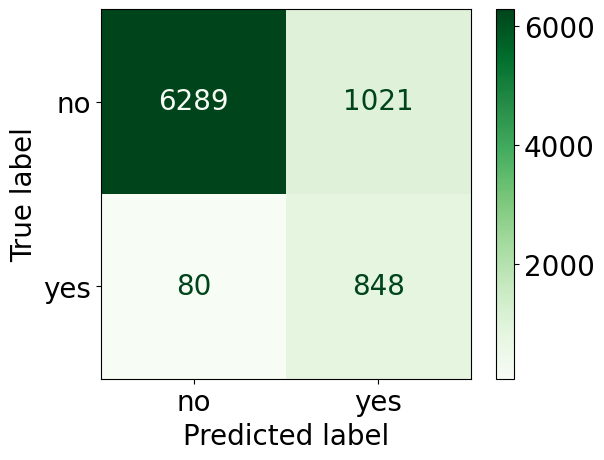

In [ ]:
from imblearn.over_sampling import RandomOverSampler

lr_over_pipe = make_pipeline(preprocess_pipeline, RandomOverSampler(random_state=42), LogisticRegression())
lr_over_pipe.fit(X_train, y_train)
y_pred = lr_over_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.99      0.86      0.92      7310
         yes       0.45      0.91      0.61       928

    accuracy                           0.87      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.87      0.88      8238



#### **3. SMOTE**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy = 0.8700, Balanced Accuracy = 0.8868
 Precision = 0.4609, Recall = 0.9084, F1-score = 0.6115


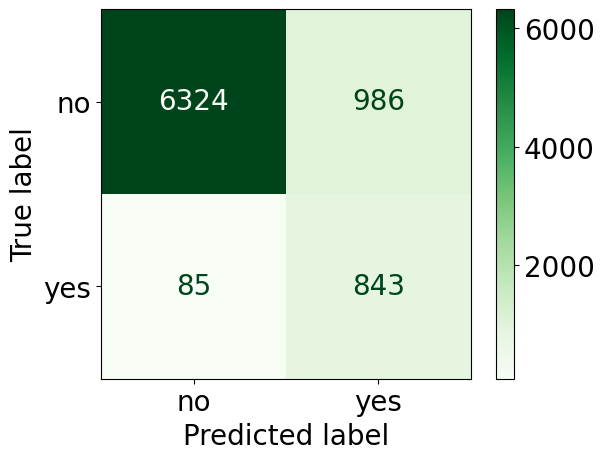

In [ ]:
lr_smote_pipe = make_pipeline(preprocess_pipeline, SMOTE(random_state=1), LogisticRegression())
lr_smote_pipe.fit(X_train, y_train)
y_pred = lr_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

          no      0.987     0.865     0.922      7310
         yes      0.461     0.908     0.612       928

    accuracy                          0.870      8238
   macro avg      0.724     0.887     0.767      8238
weighted avg      0.928     0.870     0.887      8238



#### **4. Adasyn**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy = 0.8526, Balanced Accuracy = 0.8854
 Precision = 0.4288, Recall = 0.9278, F1-score = 0.5865


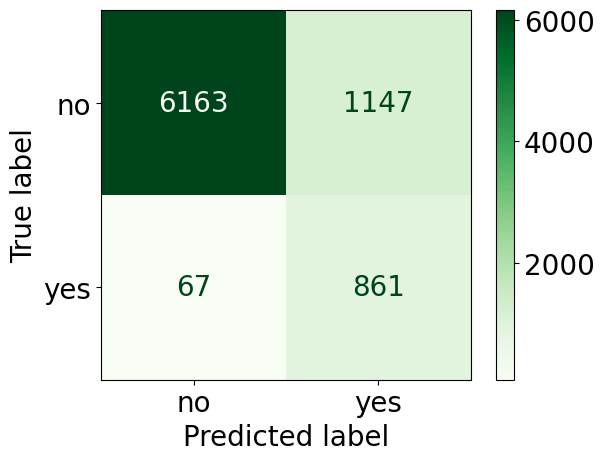

In [ ]:
lr_adasyn_pipe = make_pipeline(preprocess_pipeline, ADASYN(random_state=42), LogisticRegression())
lr_adasyn_pipe.fit(X_train, y_train)
y_pred = lr_adasyn_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.99      0.84      0.91      7310
         yes       0.43      0.93      0.59       928

    accuracy                           0.85      8238
   macro avg       0.71      0.89      0.75      8238
weighted avg       0.93      0.85      0.87      8238



#### **5. Border line SMOTE**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy = 0.8613, Balanced Accuracy = 0.8832
 Precision = 0.4436, Recall = 0.9116, F1-score = 0.5968


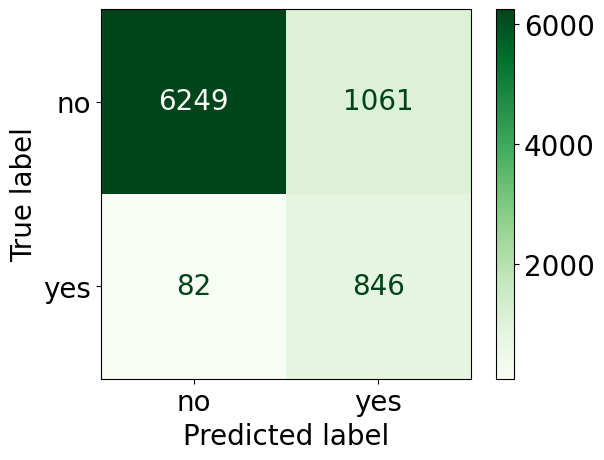

In [ ]:
lr_border_smote_pipe = make_pipeline(preprocess_pipeline, BorderlineSMOTE(random_state=42), LogisticRegression())
lr_border_smote_pipe.fit(X_train, y_train)
y_pred = lr_border_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.99      0.85      0.92      7310
         yes       0.44      0.91      0.60       928

    accuracy                           0.86      8238
   macro avg       0.72      0.88      0.76      8238
weighted avg       0.93      0.86      0.88      8238



### **ROC- Curve of Best Model**

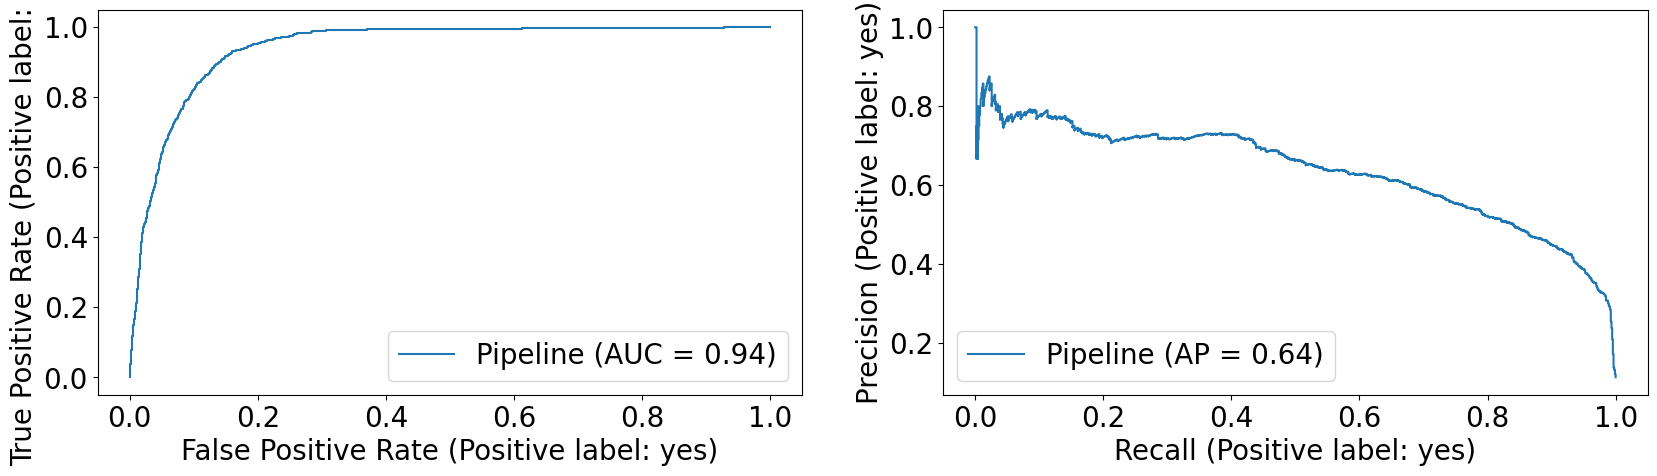

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Create a figure with two subplots side by side.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# We'll use the two returned 'Axes' (regions) to plot curves side by side
# Generate and plot the ROC curve using the Logistic Regression pipeline, passing first axis to plot ROC on
roc_curve = RocCurveDisplay.from_estimator(lr_pipeline, X_test, y_test, ax=ax1)

# Generate and plot the Precision-Recall curve using the Logistic Regression pipeline, passing second axis to plot PR curve on
pr_curve = PrecisionRecallDisplay.from_estimator(lr_pipeline, X_test, y_test, ax=ax2)

solver, penalty, and regularization strength

### **4. Decision Tree**

 Accuracy = 0.8909, Balanced Accuracy = 0.7259
 Precision = 0.5157, Recall = 0.5129, F1-score = 0.5143


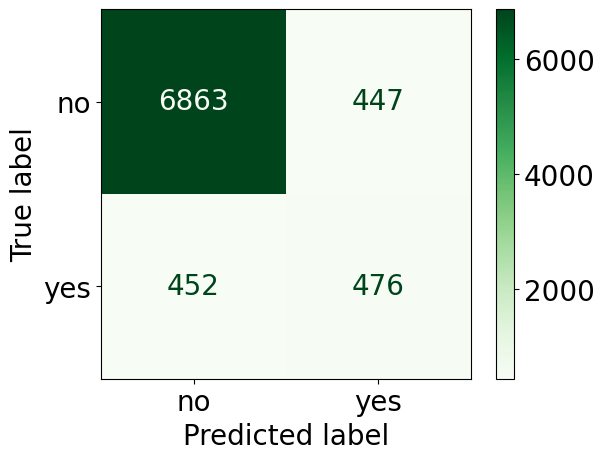

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_pipe = make_pipeline(preprocess_pipeline, DecisionTreeClassifier())  # criterion =gini, max_depth = None, min_samples_leaf = 1
dt_pipe.fit(X_train, y_train)  # fit the pipeline on training data
print_scores(y_test, dt_pipe.predict(X_test))  # apply to the test data
y_pred = dt_pipe.predict(X_test)

#### **1. Balanced**

 Accuracy = 0.8985, Balanced Accuracy = 0.7368
 Precision = 0.5518, Recall = 0.5280, F1-score = 0.5396


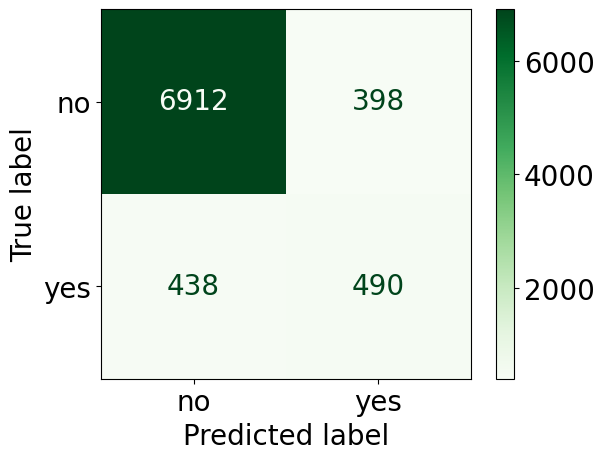

In [ ]:
dt_pipe = make_pipeline(preprocess_pipeline, DecisionTreeClassifier(class_weight='balanced'))
dt_pipe.fit(X_train, y_train)
y_pred = dt_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.94      0.95      0.94      7310
         yes       0.55      0.53      0.54       928

    accuracy                           0.90      8238
   macro avg       0.75      0.74      0.74      8238
weighted avg       0.90      0.90      0.90      8238



#### **2. Random Over Sampler**

 Accuracy = 0.8949, Balanced Accuracy = 0.7366
 Precision = 0.5335, Recall = 0.5323, F1-score = 0.5329


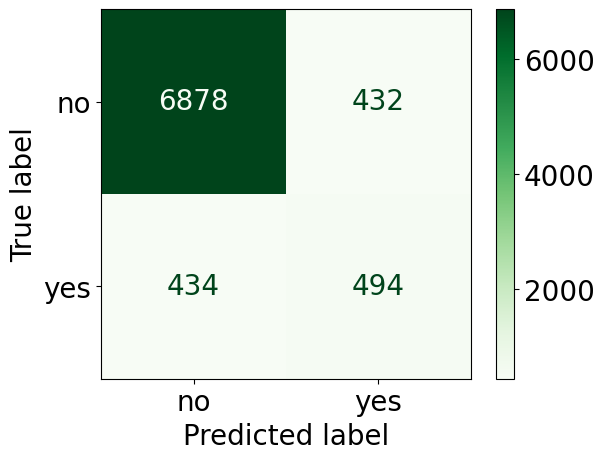

In [ ]:
from imblearn.over_sampling import RandomOverSampler

dt_over_pipe = make_pipeline(preprocess_pipeline, RandomOverSampler(random_state=42), DecisionTreeClassifier())
dt_over_pipe.fit(X_train, y_train)
y_pred = dt_over_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.94      0.94      0.94      7310
         yes       0.53      0.53      0.53       928

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.89      0.89      0.89      8238



#### **3. SMOTE**

 Accuracy = 0.8949, Balanced Accuracy = 0.7366
 Precision = 0.5335, Recall = 0.5323, F1-score = 0.5329


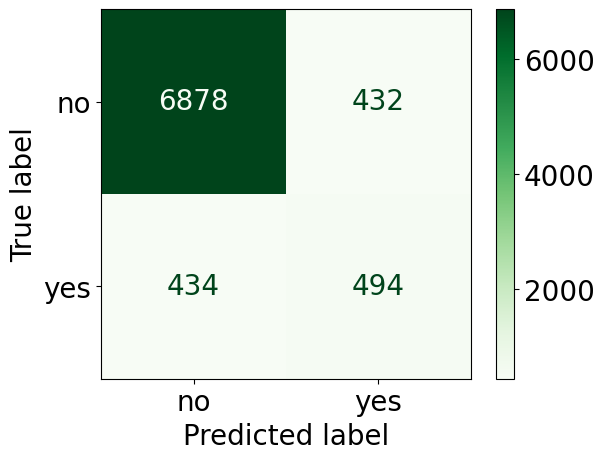

In [ ]:
from imblearn.over_sampling import SMOTE

dt_smote_pipe = make_pipeline(preprocess_pipeline, SMOTE(random_state=42), DecisionTreeClassifier())
dt_smote_pipe.fit(X_train, y_train)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.94      0.94      0.94      7310
         yes       0.53      0.53      0.53       928

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.89      0.89      0.89      8238



#### **4. ADASYN**

 Accuracy = 0.8858, Balanced Accuracy = 0.7475
 Precision = 0.4939, Recall = 0.5690, F1-score = 0.5288


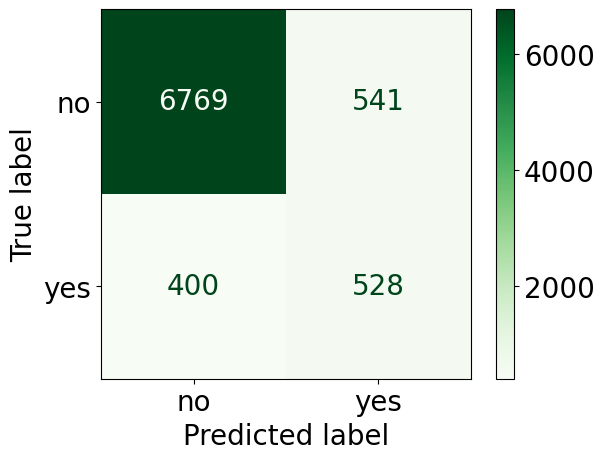

In [ ]:
from imblearn.over_sampling import ADASYN

dt_adasyn_pipe = make_pipeline(preprocess_pipeline, ADASYN(random_state=42), DecisionTreeClassifier())
dt_adasyn_pipe.fit(X_train, y_train)
y_pred = dt_adasyn_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7310
         yes       0.49      0.57      0.53       928

    accuracy                           0.89      8238
   macro avg       0.72      0.75      0.73      8238
weighted avg       0.89      0.89      0.89      8238



#### **5. Borderline SMOTE**

 Accuracy = 0.8898, Balanced Accuracy = 0.7596
 Precision = 0.5093, Recall = 0.5916, F1-score = 0.5474


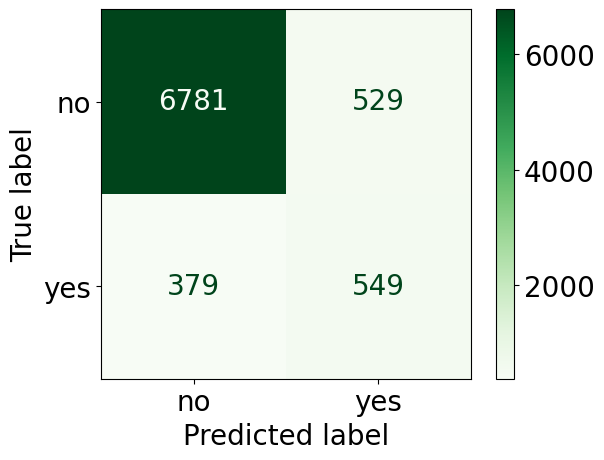

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

dt_smote_pipe = make_pipeline(preprocess_pipeline, BorderlineSMOTE(random_state=42), DecisionTreeClassifier())
dt_smote_pipe.fit(X_train, y_train)
y_pred = dt_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.95      0.93      0.94      7310
         yes       0.51      0.59      0.55       928

    accuracy                           0.89      8238
   macro avg       0.73      0.76      0.74      8238
weighted avg       0.90      0.89      0.89      8238



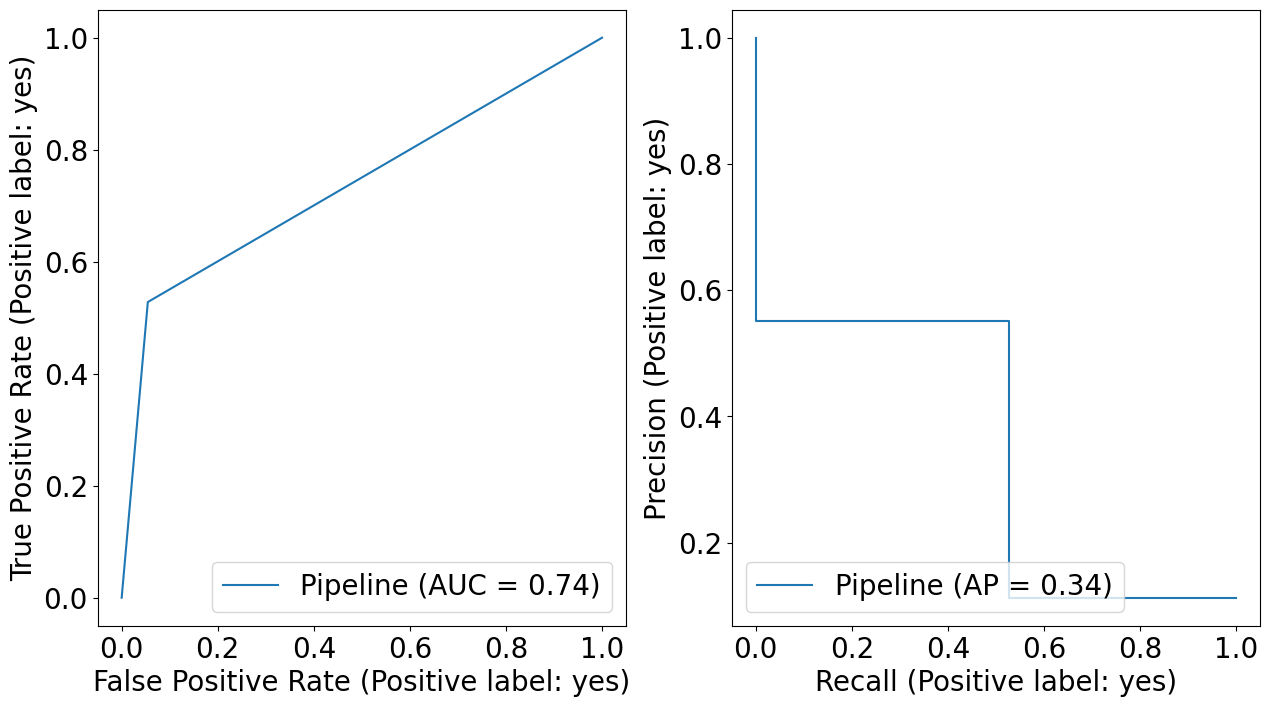

In [ ]:
# @title Precision and Recall Curve

# Import necessary libraries for plotting and metric displays
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Create a figure with two subplots side by side.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
# We'll use the two returned 'Axes' (regions) to plot curves side by side

# Generate and plot the ROC curve using the Logistic Regression pipeline, passing first axis to plot ROC on
roc_curve = RocCurveDisplay.from_estimator(dt_pipe, X_test, y_test, ax=ax1)

# Generate and plot the Precision-Recall curve using the Logistic Regression pipeline, passing second axis to plot PR curve on
pr_curve = PrecisionRecallDisplay.from_estimator(dt_pipe, X_test, y_test, ax=ax2)

### **5. Random Forest**

In [ ]:
# Random Forest pipeline using make_pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier())

# Fit the pipeline on training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('randomforestclassifier', RandomForestClassifier())])

 Accuracy = 0.9156, Balanced Accuracy = 0.7168
 Precision = 0.6876, Recall = 0.4601, F1-score = 0.5513


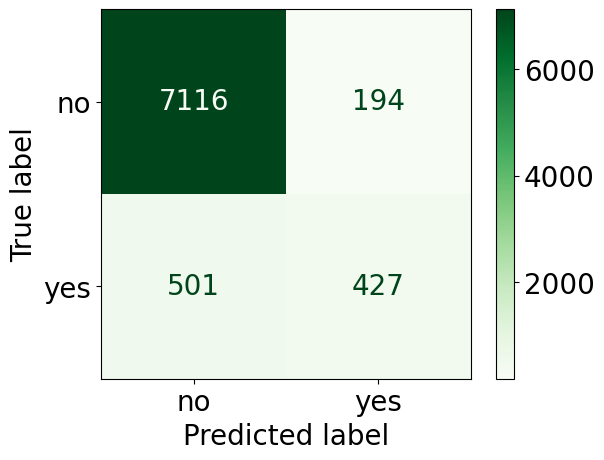

In [ ]:
print_scores(y_test, rf_pipe.predict(X_test)) # apply to the test data
y_pred = rf_pipe.predict(X_test)

The model exhibits high accuracy, but it's essential to consider other metrics like precision, recall, and F1-score, especially in situations where the dataset is imbalanced. The balanced accuracy also provides insights into how well the model performs across different classes.

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.69      0.46      0.55       928

    accuracy                           0.92      8238
   macro avg       0.81      0.72      0.75      8238
weighted avg       0.91      0.92      0.91      8238



In summary, the model performs well in predicting the "no" class, with high precision, recall, and F1-score. However, for the "yes" class, the model's performance is less balanced, with lower recall and F1-score, indicating room for improvement in capturing positive instances. The overall accuracy and weighted average metrics are high.


 Accuracy = 0.9161, Balanced Accuracy = 0.6978
 Precision = 0.7215, Recall = 0.4159, F1-score = 0.5277


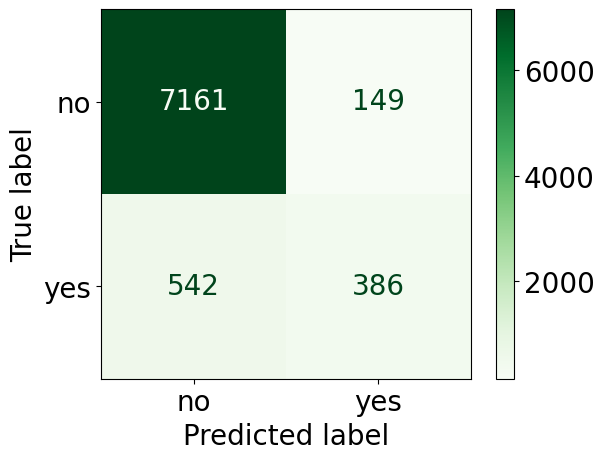

In [ ]:
rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier(class_weight='balanced'))
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
print_scores(y_test, y_pred)

In summary, while the overall accuracy is relatively high, the balanced accuracy takes into account the performance across both classes, providing a more balanced perspective. The model demonstrates reasonable precision but relatively lower recall, indicating that it may be better at correctly identifying the negative class instances ("no") but has room for improvement in capturing positive class instances ("yes"). The F1-score provides a combined measure of precision and recall, reflecting the trade-off between these two metrics.

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7310
         yes       0.72      0.42      0.53       928

    accuracy                           0.92      8238
   macro avg       0.83      0.70      0.74      8238
weighted avg       0.91      0.92      0.91      8238



#### **2. Random Over sampler**

 Accuracy = 0.9171, Balanced Accuracy = 0.7816
 Precision = 0.6390, Recall = 0.6067, F1-score = 0.6224


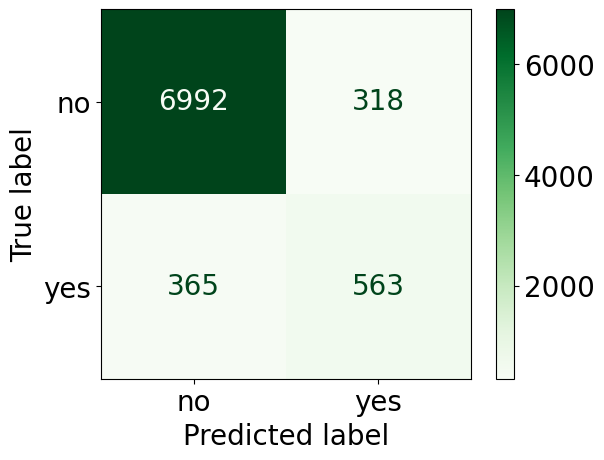

In [ ]:
rf_over_pipe = make_pipeline(preprocess_pipeline, RandomOverSampler(random_state=42), RandomForestClassifier())
rf_over_pipe.fit(X_train, y_train)
y_pred = rf_over_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.95      0.96      0.95      7310
         yes       0.64      0.61      0.62       928

    accuracy                           0.92      8238
   macro avg       0.79      0.78      0.79      8238
weighted avg       0.92      0.92      0.92      8238



#### **3. SMOTE**

 Accuracy = 0.9168, Balanced Accuracy = 0.7843
 Precision = 0.6358, Recall = 0.6131, F1-score = 0.6242


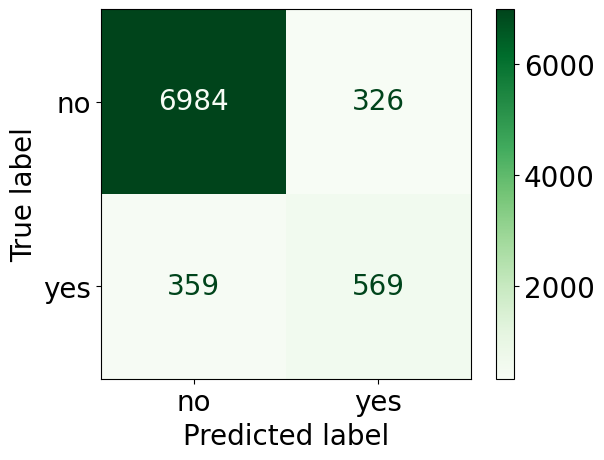

In [ ]:
rf_smote_pipe = make_pipeline(preprocess_pipeline, SMOTE(random_state=1), RandomForestClassifier())
rf_smote_pipe.fit(X_train, y_train)
y_pred = rf_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.95      0.96      0.95      7310
         yes       0.64      0.61      0.62       928

    accuracy                           0.92      8238
   macro avg       0.79      0.78      0.79      8238
weighted avg       0.92      0.92      0.92      8238



#### **4. ADASYN**

 Accuracy = 0.9159, Balanced Accuracy = 0.7767
 Precision = 0.6346, Recall = 0.5970, F1-score = 0.6152


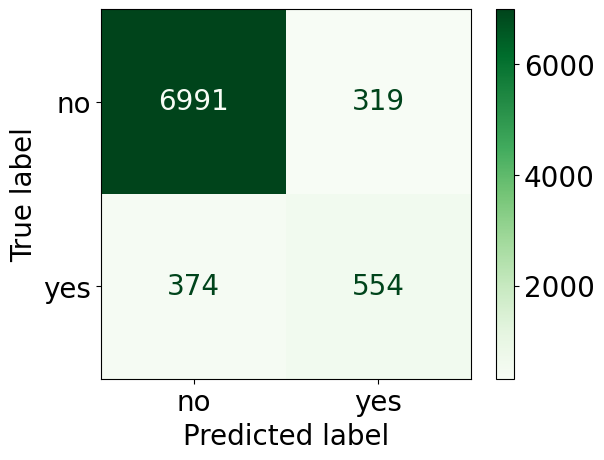

In [ ]:
rf_adasyn_pipe = make_pipeline(preprocess_pipeline, ADASYN(random_state=42), RandomForestClassifier())
rf_adasyn_pipe.fit(X_train, y_train)
y_pred = rf_adasyn_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.95      0.96      0.95      7310
         yes       0.63      0.60      0.62       928

    accuracy                           0.92      8238
   macro avg       0.79      0.78      0.78      8238
weighted avg       0.91      0.92      0.91      8238



#### **5. Borderline SMOTE**

 Accuracy = 0.9172, Balanced Accuracy = 0.7788
 Precision = 0.6417, Recall = 0.6002, F1-score = 0.6203


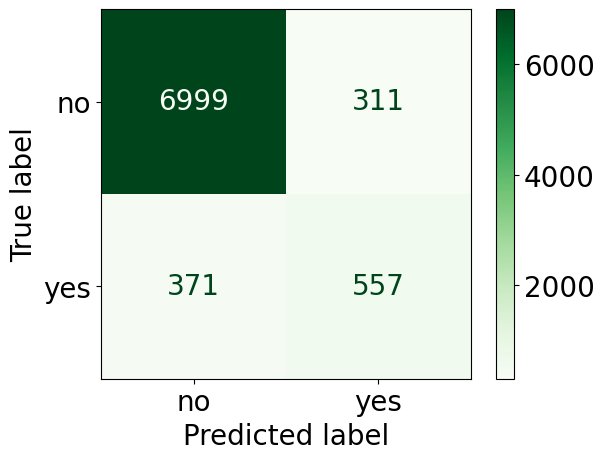

In [ ]:
rf_border_smote_pipe = make_pipeline(preprocess_pipeline, BorderlineSMOTE(random_state=42), RandomForestClassifier())
rf_border_smote_pipe.fit(X_train, y_train)
y_pred = rf_border_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          no       0.95      0.96      0.95      7310
         yes       0.64      0.60      0.62       928

    accuracy                           0.92      8238
   macro avg       0.80      0.78      0.79      8238
weighted avg       0.91      0.92      0.92      8238



## **Hyperparameter Tuning:**

For our top three models we will be doing hyperparamter tuning

#### **1. Logistic regression**

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

# from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # default=’lbfgs
        'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # default=’l2’
        'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],  # Cfloat, default=1.0
        'logisticregression__max_iter': [10, 50, 100]
    }
]


lr_grid_search = HalvingGridSearchCV(lr_over_pipe, param_grid, cv = 3, scoring = 'balanced_accuracy')
lr_grid_search.fit(X_train, y_train)


cv_res = pd.DataFrame(lr_grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

Streaming output truncated to the last 5000 lines.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/co

,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,mean_test_score
446,100,10,none,saga,0.869810
447,1.0,10,l2,saga,0.869758
449,1.0,10,l1,saga,0.869078
450,1.0,10,l2,saga,0.867059
451,100,10,none,saga,0.866992


In [ ]:
# We'll work with the best model obtained from grid search.
model = lr_grid_search.best_estimator_

# What is the accuracy if we applied that to the test data we set aside at near the beginning?
pred_y = model.predict(X_test)
print('The balanced accuracy is %.2f.' % balanced_accuracy_score(y_test, pred_y))

The balanced accuracy is 0.89.


#### **2. SVM**

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {
        'svc__C': [100, 10, 1.0, 0.1, 0.01],  # default=1.0
        'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],  # default=’rbf’
        'svc__gamma': ['scale', 'auto']  # Cfloat, default=scale
    }
]

svm_grid_search = HalvingGridSearchCV(svm_smote_pipe, param_grid, cv=3, scoring='balanced_accuracy')
svm_grid_search.fit(X_train, y_train)

cv_res = pd.DataFrame(svm_grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 217, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a square matrix.

,param_svc__C,param_svc__gamma,param_svc__kernel,mean_test_score
74,0.01,scale,linear,0.866734
73,0.1,scale,linear,0.866132
40,0.01,scale,linear,0.848729
45,0.01,auto,linear,0.848729
37,0.1,auto,rbf,0.841381


In [ ]:
# We'll work with the best model obtained from grid search.
model = svm_grid_search.best_estimator_

# What is the accuracy if we applied that to the test data we set aside at near the beginning?
pred_y = model.predict(X_test)
print('The balanced accuracy is %.2f.' % balanced_accuracy_score(y_test, pred_y))

The balanced accuracy is 0.88.


#### **3. KNN**

In [ ]:
# Define the parameter grid
param_grid = [
    {
        'kneighborsclassifier__n_neighbors': list(np.random.randint(1, 100, size=5)),
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    }
]


knn_grid_search = HalvingGridSearchCV(knn_smote_pipe, param_grid, cv=3, scoring='balanced_accuracy')
knn_grid_search.fit(X_train, y_train)

cv_res = pd.DataFrame(knn_grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklea

,param_kneighborsclassifier__algorithm,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,mean_test_score
59,brute,59,uniform,0.866115
60,brute,59,distance,0.865920
58,brute,59,distance,0.861127
57,brute,59,uniform,0.860498
56,ball_tree,87,distance,0.859153


In [ ]:
# We'll work with the best model obtained from grid search.
model = knn_grid_search.best_estimator_

# What is the accuracy if we applied that to the test data we set aside at near the beginning?
pred_y = model.predict(X_test)
print('The balanced accuracy is %.2f.' % balanced_accuracy_score(y_test, pred_y))

The balanced accuracy is 0.88.


## **Ensemble Learnning**

### **Boosting**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state=0) #split all

train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

train_X.shape, test_X.shape, train_y.shape, test_y.shape # check sizes

((32950, 20), (8238, 20), (32950,), (8238,))

In [ ]:
# preprocess the training data
tr_X = preprocess_pipeline.fit_transform(train_X)
tr_y = train_y
# preprocess the test data
t_X = preprocess_pipeline.transform(test_X)
t_y = test_y
# check sizes
train_X.shape, tr_X.shape, tr_y.shape, t_X.shape, t_y.shape

((32950, 20), (32950, 63), (32950,), (8238, 63), (8238,))

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_clf = HistGradientBoostingClassifier(max_leaf_nodes=16, max_iter=10, learning_rate=.1) # λ
hgb_clf.fit(tr_X, tr_y)
print(f'Gradient boosting with {hgb_clf.max_iter} trees leads to accuracy of {hgb_clf.score(t_X, t_y):.4f}.')

Gradient boosting with 10 trees leads to accuracy of 0.9018.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

param_grid = {'max_leaf_nodes': randint(2, 16),
              'max_iter': randint(2, 32),
              'learning_rate': loguniform(1e-2, 1)}

rand_search = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=42),
                                 param_grid, cv=5, n_iter = 50, scoring='accuracy',
                                 random_state=42)

rand_search.fit(tr_X, tr_y)
rand_cv_res = pd.DataFrame(rand_search.cv_results_)
rand_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_learning_rate,param_max_iter,param_max_leaf_nodes,mean_test_score
26,0.138321,29,10,0.914871
16,0.413804,10,11,0.914810
43,0.33233,27,8,0.914780
1,0.362562,22,8,0.914203
44,0.348285,8,12,0.913778


## **Conclusion**

1. Out of the 5 used ML Algorithms i.e. Random Forest, Decision Tree, KNN, SVM, Logistic Regression - SVM, KNN and Logistic Regression gave the best predictions/results.

2. To handle class imbalance we implemented various balancing techniques like SMOTE, ADASYN, Random Over sampling etc, and were able to see increase in the balanced accuracy overall, highest being **88.71%** for **Logistic Regression**.

3. Out of all the classification algorithms after implementing hyperparameter tuning and ensembling, the performance of **Logistic Regression Model** gave the best results with highest **`balanced accuracy to be 89%`**.

4. The Top 5 features for our overall best model (Logistic Regression) came out to be as:
```
i. Job
ii. Poutcome
iii. Month
iv. Duration
v. Contact
```


## **Challenges**

1. Faced challenges in choosing the dataset, since many were overly used which included pre-developed codes and certain manipulations. We wanted our predictions and implementing techniques to not go in a biased way, hence we were able to select this rerely used dataset.

2. We came to know about the `class Imbalance` nature of our dataset. Our dataset was highly imbalance, for which we had to carry out several sampling techniques. To decide on the best one was a challenge.

3. After implementing various `sampling techniques` such as SMOTE, ADASYN, and others, we found that their balanced accuracy figures were quite similar. Deciding which factors to prioritize and where `compromises` were acceptable became our challenge. We had to weigh considerations like interpretability, noise robustness, handling overfitting, and other costs specific to each model. These factors played a pivotal role in determining the most suitable models aligned with our project objectives

4. The `execution` of complex models/techniques like SVM, specially doing the hyperparameter tuning etc., `took very long time` (around 2 hours or so), which made us rethink on considering it as best or not, in terms of `Computational Cost` and `Interpretability` of those models/techniques.


## **References**

1. https://levelup.gitconnected.com/a-comprehensive-analysis-of-hyperparameter-optimization-in-logistic-regression-models-521564c1bfc0
2. Used Lab references by professor in deciding the foctors to consider while choosing best Ensembling/Model tuning etc.
3. Used ChatGPT to check grammar and spelling mistakes.
4. Took help to resolve longer execution of models over Google and from `TA-Howard Cheng`.
5. ChatGPT Prompts: 'so there are many hyperparameters for logistic regression. but can you give me the top 4 hyperparamters that are the most impactful for classification problem?', 'How to resolve longer execution of SVM model'
6. www.youtube.com - To know more about each classification models in depth.





